In [1]:
!pip install justext

     |████████████████████████████████| 870kB 7.9MB/s 


In [0]:
import numpy as np
import nltk
import justext
import re
from nltk.tokenize import sent_tokenize
import collections

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

1.1.1

In [0]:
def top_txt(txt,top):
  most_common_words = [word for (word,f) in collections.Counter(txt).most_common(top)]
  return ''.join([word if word in most_common_words or word=='N' else '<unk>' for word in txt])
def replace_numbers(txt):
  #TODO:: Check replace numbers RegEx.
  num_format = re.compile("^[\-]?[1-9][0-9]*\.?[0-9]+$")
  return "".join([word if not re.match(num_format,word) else 'N' for word in txt])
def remove_punc(txt):
  without_punc = "".join([ c if c not in '.,:;?!@#*&%$<>' else '' for c in txt])
  return without_punc.replace("  "," ")
def tokenize(txt):
  return " ".join(nltk.word_tokenize(txt))
def segment_sents(txt):
  return "\n".join(nltk.sent_tokenize(txt))
def lower_txt(txt):
  return txt.lower()

In [0]:
def ptb_preprocess(filenames, top=10000):
  for filename in filenames:
    with open(filename) as myfile:
      

      txt_file =  myfile.read().replace('\n',' ')
      paragraphs = justext.justext(txt_file, justext.get_stoplist("English"))
      raw_text = "\n".join([p.text for p in paragraphs if not p.is_boilerplate])


      # raw_text = lower_txt(raw_text)
      # raw_text = segment_sents(raw_text)
      # print('segment_sents')
      # print(raw_text[:200])
      # raw_text = remove_punc(raw_text)
      # print('remove_punkt')
      # print(raw_text[:200])
      # raw_text = tokenize(raw_text)
      # print('tokenize')
      # print(raw_text[:200])
      # raw_text = replace_numbers(raw_text)
      # print('replace_numbers')
      # print(raw_text[:200])
      # raw_text = top_txt(raw_text,top)
      # print('top_txt')
      # print(raw_text[:200])

      raw_text = top_txt(raw_text,top)
      raw_text = replace_numbers(raw_text)
      raw_text = tokenize(raw_text)
      raw_text = segment_sents(raw_text)
      raw_text = remove_punc(raw_text)
      raw_text = lower_txt(raw_text)
      
      
      new_filename = filename+'.out'
      #print(new_filename)
      with open(new_filename, "w") as text_file:
        text_file.write(raw_text)



In [6]:
!wget https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt 

--2019-12-24 10:18:59--  https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4573338 (4.4M) [text/plain]
Saving to: ‘shakespeare_input.txt’

shakespeare_input.t 100%[===================>]   4.36M  3.83MB/s    in 1.1s    

2019-12-24 10:19:01 (3.83 MB/s) - ‘shakespeare_input.txt’ saved [4573338/4573338]



1.1.1 Discussion: According to the descripted above if we apply the conventions of Penn Treebank, we shall give independent meaning for every word after the tokenization. Also, if we use character-level language model, we shall get another definition - morphological, because now we care about structure of the word.

1.1.2 :

In [7]:
!wget http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz
!tar zxvf simple-examples.tgz

!ls simple-examples/data
!mv ./simple-examples/data ../data

--2019-12-24 10:19:03--  http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34869662 (33M) [application/x-gtar]
Saving to: ‘simple-examples.tgz’

simple-examples.tgz 100%[===================>]  33.25M  19.9MB/s    in 1.7s    

2019-12-24 10:19:06 (19.9 MB/s) - ‘simple-examples.tgz’ saved [34869662/34869662]

./
./simple-examples/
./simple-examples/data/
./simple-examples/data/ptb.test.txt
./simple-examples/data/ptb.train.txt
./simple-examples/data/ptb.valid.txt
./simple-examples/data/README
./simple-examples/data/ptb.char.train.txt
./simple-examples/data/ptb.char.test.txt
./simple-examples/data/ptb.char.valid.txt
./simple-examples/models/
./simple-examples/models/swb.ngram.model
./simple-examples/models/swb.rnn.model
./simple-examples/models/README
./sim

In [8]:
!ls

sample_data  shakespeare_input.txt  simple-examples  simple-examples.tgz


In [9]:
len(set(remove_punc('hello, you, hello').split()))

2

In [0]:
def num_token(txt):
  txt = txt.lower()
  return len(nltk.word_tokenize(txt))
def num_char(txt):
  return len(''.join(txt.split()))
def dist_words(txt): #vocabulary size
  txt = txt.lower()
  return len(set(remove_punc(txt).split()))
def topN_words(txt,N):
  most_common_words = ' '.join([word for (word,f) in collections.Counter(txt).most_common(N)])
  return num_tokenize(most_common_words)
def token_type_ratio(txt):
  return num_token(txt)/dist_words(txt)

def types_oov(txt_dev,txt_train): #Out Of Vocabulary 
    txt_dev = txt_dev.lower()
    text_dev_set = set(remove_punc(txt_dev).split())
    txt_train = txt_train.lower()
    text_train_set = set(remove_punc(txt_train).split())
    return len(tex_dev_set.difference(text_train_set))
def avg_sd_char_token(txt):
  total_chars = sum( [len(w) for w in nltk.word_tokenize(txt)])
  avg =  total_chars/num_token(txt)

  total_avg_chars = sum( [len(w)-avg for w in nltk.word_tokenize(txt)])
  sd =  total_chars/num_token(txt)
  return avg,sd

def dist_n_gram_words(txt,n=[2,3,4]):
  txt = txt.lower()
  txt = nltk.word_tokenize(txt)
  ans = {}
  for i in n:
    ans[i] = diff_grams(txt,i)
  return ans

def dist_n_gram_chars(txt,n=range(1,8)):
  ans = {}
  for i in n:
    ans[i] = diff_grams(txt,i)
  return ans

def diff_grams(txt,n):
  s = set()
  gram = list(range(0,n))
  while gram[-1]!=len(txt):
    next_gram = tuple([txt[g] for g in gram])
    s.add(next_gram)
    gram = [g+1 for g in gram]
  return len(s)

In [11]:
# you need matplotlib version 1.4 or above
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
%matplotlib inline
def power_law_rule(corpus):
  corpus = lower_txt(corpus)
  corpus = tokenize(corpus)
  plt.loglog([val for word,val in collections.Counter(corpus).most_common(4000)])
  plt.xlabel('rank')
  plt.ylabel('frequency');

3.1.2


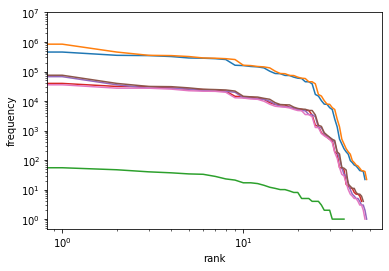

In [12]:
import os

dir = '../data'
for filename in os.listdir(dir):
  with open(dir+'/'+ filename,'r') as file:
      data = file.read()
      power_law_rule(data)

1.2 n-gram Word Language Model

In [0]:
#how to calculate the freq of h*w
#how to calculate the freq of w.

from collections import Counter,defaultdict
import math
from functools import reduce

class LangModell:
  def predict_next_word(self,prev_words):
    pass
  def evaluate_next_word(self,prev_word):
    pass
  
class n_gram_model():
  def __init__(self,gamma=0):
    self.outlm = {}
    self.freq_words = collections.Counter()
    self.gamma = gamma

  def train_model(self, dataset,n,pre_process,tokenize=True):
    lm = defaultdict(Counter)
    if pre_process == True :
      ptb_preprocess([dataset])
    filename =  dataset if pre_process == False else dataset+'.out'
    with open(filename) as file:
      data = file.read()
      if tokenize:
        data = nltk.word_tokenize(data)
    self.freq_words = collections.Counter(data)
    n = n-1
    if tokenize:
      pad = ["~"] * n
    else:
      pad = '~' * n
    data = pad + data
    for i in range(len(data)-n):
        history, word = tuple(data[i:i+n]), data[i+n]
        lm[history][word]+=1

    def normalize(counter):

       #(c+gamma)/(N+B*gamma) according to the lidstone estimator from the NLTK docs.
      
        N = float(sum(counter.values()))
        B = len(counter)
        return { word : c+self.gamma/(N+B*self.gamma) for word,c in counter.items()}

    self.freq_words= {word:freq/len(data) for word,freq in self.freq_words.items()}
    self.not_normalized_lm = lm
    self.outlm = {hist:normalize(cntr) for hist, cntr in lm.items()}

  def predict_next_word(self, prev_words,chars=False):
    if chars:
      possible_words = self.outln(tuple(prev_words))
    else:
      possible_words =  self.outlm[tuple(nltk.word_tokenize(prev_words.lower()))]
    next_word, prob = max(possible_words.items(), key=lambda x:x[1])
    return next_word,prob

  def evaluate_next_word(self, prev_words,next_word):
    prev_words = tuple(nltk.word_tokenize(prev_words.lower()))
    if prev_words in self.outlm:
      counter = self.not_normalized_lm[prev_words]
      N = float(sum(counter.values()))
      B = len(counter)
      c = self.not_normalized_lm[prev_words][next_word]
      return (c+self.gamma)/(N+B*self.gamma) 
    return 0

def perplexity(model,test_filename,pre_process=True,n=2):
  if pre_process == True:
    ptb_preprocess([test_filename])
    filename = test_filename+'.out'
  else:
    filename=test_filename
  with open(filename) as file:
    data = nltk.word_tokenize(file.read())
  answer = 1
  #print("Number of tested tokens :", len(data))
  for i in range(len(data) - (n+1)):
    prev_words = ' '.join(data[i:i+n-1])
    next_word = data[i+n-1]
    eval = model.evaluate_next_word(prev_words,next_word)
    #print(eval)
    if eval!=0:
      eval = (1/eval) **(1/len(data))
      answer*= eval
  return answer  

def cross_entropy(model,test_filename,pre_process=True):
  #TODO: validate how to calculate it
  if pre_process == True:
    ptb_preprocess([test_filename])
    filename = test_filename+'.out'
  else:
    filename = test_filename
  with open(filename) as file:
    data = nltk.word_tokenize(file.read())
  return sum( [math.log(model.freq_words[word],2)/len(data) for word in data] )

def train_word_gen(dataset,n=2,gamma=0):
  lm = n_gram_model(gamma=gamma)
  lm.train_model(dataset,n,False)
  return lm

def train_word_lm(dataset,n=2,tokenize=True):
  lm = n_gram_model()
  lm.train_model(dataset,n,False,tokenize=tokenize)
  return lm

In [28]:
#Example:
lm = train_word_lm('../data/ptb.train.txt')
lm.predict_next_word('Not')

('to', 117.0)

*1.2.2 How much memory do you expect a model to occupy? Refer to the statistics results above and provide worst-case estimates as well as expected.*

**Answer:** For each bigram in the text, we a list of tuples - each the size of 2 (bigram) and a word after it.
We can compute with the statistics the total number of distinct bigrams and multiply it by total number of distinct words in the corpus - that will be the worst case.

In [29]:
with open('../data/ptb.train.txt','r') as file:
  data = file.read()
  print(dist_words(data))
  print(dist_n_gram_words(data,n=[2]))



9941
{2: 277419}


In [30]:
perplexity(lm,'../data/ptb.test.txt',False)

16.545459326639662

In [31]:
cross_entropy(lm,'../data/ptb.test.txt',False)

-9.063709298744856

##1.3.1

Text(0, 0.5, 'PERPLEXITY')

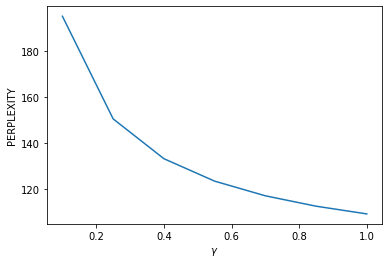

In [18]:

gamma_values = np.linspace(0.1,1,num=7)
perplexity_values = []
for gamma in gamma_values:
  lm = train_word_gen('../data/ptb.train.txt',gamma=gamma)
  perplexity_values += [perplexity(lm,'../data/ptb.valid.txt')]

plt.plot(gamma_values,perplexity_values)
#plt.loglog([val for word,val in collections.Counter(corpus).most_common(4000)])
plt.xlabel('$\gamma$')
plt.ylabel('PERPLEXITY')

*************
2
*************
109.09225296489092
*************
4
*************
1.4732221154037362
*************
6
*************
1.0219284781911773
*************
8
*************
1.0041402175981577
*************
10
*************
1.0015080066888122
*************
12
*************
1.0001703209355337
*************
14
*************
1
*************
16
*************
1
*************
18
*************
1


Text(0, 0.5, 'PERPLEXITY')

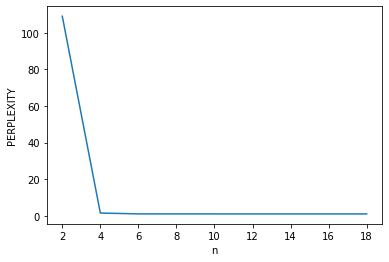

In [19]:
best_gamma = 1 #according to the plot above

n_values = list(range(2,20,2))
perplexity_values = []
for n in n_values:
  print('*************')
  print(n)
  print('*************')
  lm = train_word_gen('../data/ptb.train.txt',n=n,gamma=best_gamma)
  print (perplexity(lm,'../data/ptb.valid.txt',n=n))
  perplexity_values += [perplexity(lm,'../data/ptb.valid.txt',n=n)]

plt.plot(n_values,perplexity_values)
#plt.loglog([val for word,val in collections.Counter(corpus).most_common(4000)])
plt.xlabel('n')
plt.ylabel('PERPLEXITY')

In [20]:
best_n = 3
best_gamma =1

lm = train_word_gen('../data/ptb.train.txt',n=best_n,gamma=best_gamma)
print(perplexity(lm,'../data/ptb.test.txt',n=best_n))



6.202578534555306


#TODO: for Nitzan
1. Check what happens when for P(a|b) b=0 and specifically for our ngrams model
2. Check with others about the perplexity when n>2
3. compare perplexity graph accoridng to gamma

1.3.2 Generating text

Another way to evaluate a language model is to use the model in a generative manner - that is, to randomly sample sentences starting from a seed prefix, and generating each next word by sampling from the model distribution p(w | prefix).

Discuss ways to generate when the seed is shorter than the history length of the n-gram model. Discuss ways to decide when the generation should stop. In this question, when you sample from the LM given a history, pick the most likely word generated by the LM. Report at least 5 randomly generated segments on different seeds and comment on what you observe.

In [0]:
def generate(model,seed):
  p = 0
  output = seed
  while True:
    next_word, prob = model.predict_next_word(seed)
    output = ' '+ next_word
    p+= prob
    if p>=1:
      break
  return output

##1.4

In [33]:
#download the dataset
!wget http://www.ffts.com/recipes/lg/lg32965.zip
!unzip lg32965 -d recipes_dataset
!rm lg32965.zip
!ls

--2019-12-24 10:23:42--  http://www.ffts.com/recipes/lg/lg32965.zip
Resolving www.ffts.com (www.ffts.com)... 66.96.149.1
Connecting to www.ffts.com (www.ffts.com)|66.96.149.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11805248 (11M) [application/zip]
Saving to: ‘lg32965.zip’

lg32965.zip         100%[===================>]  11.26M  13.8MB/s    in 0.8s    

2019-12-24 10:23:43 (13.8 MB/s) - ‘lg32965.zip’ saved [11805248/11805248]

Archive:  lg32965.zip
replace recipes_dataset/11000.mmf? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
recipes_dataset  shakespeare_input.txt	simple-examples.tgz  tmp_train.txt
sample_data	 simple-examples	tmp_test.txt


In [34]:
#prepare dataset
with open('recipes_dataset/32965.mmf',errors='ignore') as file:
  recipes=[]
  collector = []
  for line in file:
    line = str(line).replace('MMMMM','')#.replace('\n','')
    if 'Recipe via Meal-Master (tm) v8.05' in line:
      recipes += [''.join(collector)]
      collector = []
    else:
      collector += [line]
  recipes += [''.join(collector)]
  recipes = recipes[1:]

#print statistics
total_recipes = ''.join(recipes)
print('number of recipes',len(recipes))
print('number of tokens',num_token(total_recipes))
print('number of characters',num_char(total_recipes))
print('vocabulary size',dist_words(total_recipes))
#TODO: figure out what Elhadad means by dist. of size of recipes: words,characters, etc. 


number of recipes 965
number of tokens 201821
number of characters 783933
vocabulary size 10676


In [0]:
class MyDataLoader():

  def __init__(self,dataset):
    from math import floor,ceil

    self.train_data = dataset[0:floor(0.8*len(dataset))]
    self.valid_data = dataset[ceil(0.8*len(dataset)):floor(-0.1*len(dataset))]
    self.test_data = dataset[ceil(-0.1*len(dataset)):]

In [62]:
#TODO: im not sure what Yoav Goldberg's article should I be referring to, none makes sense...

dataloader = MyDataLoader(recipes)
joined_recipes_train = '\n'.join(dataloader.train_data)
joined_recipes_test = '\n'.join(dataloader.test_data)

# with open('tmp_train.txt', "w") as text_file:
#   text_file.write(joined_recipes_train)
# with open('tmp_test.txt', "w") as text_file:
#   text_file.write(joined_recipes_test)

#using Ben Eyal's implementation for chars lang. model


def create_lm(data, n=5):
    pad = '*' * (n-1)
    data = pad + data
    cfd = nltk.ConditionalFreqDist((data[i : i + n-1], data[i + n-1]) for i in range(len(data) - (n-1)))
    cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)
    return cpd

n = 5
lm = create_lm(joined_recipes_train, n)
out = []
hist = '*' * (n-1)

for _ in range(500):
    letter = lm[hist].generate()
    hist = hist[1:] + letter
    out.append(letter)
print(''.join(out))

def eyal_perplexity(lm,data):
  for i in range(len(data) - (n+1)):
      prev_chars = data[i:i+n-1]
      next_char= data[i+n-1]
      eval = lm[prev_chars].prob(next_char)
      #print(eval)
      if eval!=0:
        eval = (1/eval) **(1/len(data))
        answer*= eval
  return answer  




MEAT & Steamed Red by Bettes on alback
               :       Jul 1996 21:54:41
  1 1/2 c  When you cannema@wizard. Knead crackery whiskey
    Salad with batter the pepper. ***You may beans in the garnish
  to 350F and rice.
  
  Peanut Marnish for 5 minutes.  Stir into tasted bake than 11x16 inches (as mangoes
        1/4 ts Italian segment occasionalumin
    9 c  Sugar milk, rub who lighter an electrich Harned.
  
    1      1 tb Vegetables a large bowl of and first
  20-30 minutes coat.  Ital


In [54]:
lm['cake'].prob(' ')

0.5

In [39]:
print(lm.outlm)

{('~', '~'): {' ': 4.0, '~': 122.0, '\n': 3.0, 'f': 1.0, 'g': 1.0, 'F': 1.0, 'G': 1.0}, ('~', ' '): {'\n': 1.0, '-': 7.0, 'd': 1.0, 'I': 1.0, 'F': 2.0, '2': 3.0, 'P': 3.0, 'f': 3.0, 'C': 7.0, 'o': 2.0, 'R': 3.0, 'S': 3.0, 'A': 1.0, 'J': 1.0, 'L': 1.0, '3': 2.0, '4': 2.0, '5': 2.0, '6': 2.0, '~': 1.0, '*': 2.0, '1': 1.0, 'D': 2.0, 'B': 1.0, 'O': 2.0}, (' ', '\n'): {' ': 3728.0, '\n': 1543.0, '-': 40.0}, ('\n', ' '): {' ': 20208.0, 'C': 772.0, '\n': 3859.0, '1': 3.0}, (' ', ' '): {' ': 47976.0, 'T': 1168.0, 'Y': 805.0, '1': 4530.0, 'W': 298.0, 'U': 52.0, '-': 680.0, '2': 1454.0, 'V': 67.0, 'O': 272.0, 'P': 673.0, 'S': 1131.0, 'I': 313.0, 'c': 463.0, 'B': 519.0, 'L': 165.0, '5': 99.0, '\n': 1448.0, '~': 39.0, 'M': 408.0, 'u': 124.0, 't': 568.0, 'w': 242.0, 'C': 1026.0, 'p': 311.0, '9': 17.0, '8': 107.0, '3': 568.0, 'o': 326.0, 'd': 144.0, 'm': 398.0, 'i': 267.0, '4': 326.0, 'v': 50.0, 's': 647.0, 'h': 131.0, 'J': 125.0, 'A': 350.0, 'R': 389.0, ':': 222.0, '*': 79.0, 'D': 267.0, '6': 166.0